# Ford GoBike System Data Analysis and Visualizations
## by Bilal Almajnooni

1. [Preliminary Wrangling](#PreWrang)

2. [What is the structure of your dataset?](#struct)

3. [Univariate Exploration](#uni)

    3.1 [What is the range of trip length for most bike users?](#tlbike)
    
    3.2 [Which start/end station had the most visits?](#start-end-station)
    
    3.3 [At what time do people usually use the service? and when do they finish?](#service-time)
    
    
4. [Bivariate Exploration](#bi)

    4.1 [What age group is the most active for each gender?](#age-active)
    
    4.2 [Do users that have a subcription take longer trips than customers?](#ltsubxcus)
    
    4.3 [Do subsrcibers have their own lineup of bikes or do they use the same ones customers use?](#lubsubxcus)
    
    
5. [Multivariate Exploration](#multi)
    
    5.1 [How many trips did the bikes take from the same start station to the same end station?](#tripcount)
    
    5.2 [What is the peak trip duration and age for bikers on each day of the week?](#peaktrip)

<a id='PreWrang'></a>

## 1. Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


We have `183,412` observations, and `16` features.

We need to adjust our variables with the following to enhance our dataset:
- Drop rows that contain null values.
- `start_time` and `end_time` should *datetime* instead of *object*.
- `start_station_id`, and `end_station_id` should be *int* instead of *float*.
- `user_type`, `member_gender`, and `bike_share_for_all_trip` should be *category* instead of *object*.
- Derive age from `member_birth_year` and create `member_age` column to store the values in it.

In [7]:
# Make a copy
df_clean = df.copy()

In [8]:
# Drop rows with null values
df_clean = df_clean.dropna()

In [9]:
# Convert to datetime
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

In [10]:
# Convert to int
df_clean.start_station_id = df_clean.start_station_id.astype('int64')
df_clean.end_station_id = df_clean.end_station_id.astype('int64')

In [11]:
# Convert to category
df_clean.user_type = df_clean.user_type.astype('category')
df_clean.member_gender = df_clean.member_gender.astype('category')
df_clean.bike_share_for_all_trip = df_clean.bike_share_for_all_trip.astype('category')

In [12]:
# Convert member_birth_year dtype to int64 and then derive age and create a new column called member_age
df_clean.member_birth_year = df_clean.member_birth_year.astype('int64')
df_clean['member_age'] = pd.to_datetime('today').year - df_clean.member_birth_year

In [13]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int64         
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  int64         
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [14]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,37
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,49
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,32
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,47
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,62


In [15]:
df_clean.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,member_age
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135,36.196865
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731,10.118731
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,20.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000,29.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000,34.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000,41.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,143.000000


It seems we have someone who put his/her birth year 1878 instead of 1978. Let's first check if there are others with the same mistake.

In [16]:
df_clean.member_birth_year.sort_values()

27370     1878
171757    1900
38932     1900
115637    1900
1285      1900
          ... 
176639    2001
180263    2001
157451    2001
111857    2001
90142     2001
Name: member_birth_year, Length: 174952, dtype: int64

In [17]:
df_clean.query('member_birth_year == 1878')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
27370,1474,2019-02-25 09:28:42.161,2019-02-25 09:53:17.068,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,386,24th St at Bartlett St,37.752105,-122.419724,6436,Customer,1878,Female,No,143


Looks like only one wrong entry, let's fix it.

In [18]:
df_clean.member_birth_year.replace(1878,1978,inplace=True)
df_clean.member_age.replace(143, 43,inplace=True)

In [19]:
df_clean.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,member_age
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803706,36.196294
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.115522,10.115522
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1900.000000,20.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000,29.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000,34.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000,41.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,121.000000


In [20]:
df_clean.groupby('member_birth_year').member_birth_year.count()

member_birth_year
1900      53
1901       6
1902      11
1910       1
1920       3
        ... 
1997    3476
1998    3208
1999    2504
2000    1675
2001      34
Name: member_birth_year, Length: 74, dtype: int64

<a id='struct'></a>

### 2. What is the structure of your dataset?

>It consists of the following parts:
>- Trip time: which includes duration, start time and end time.
>- Station info: which includes id, name, latitude, and longitude for both start and end stations.
>- Bike info: which includes id.
>- User info: which includes type(customer, subscriber), birth year, gender, and whether the user took the bike for the whole trip.

### What is/are the main feature(s) of interest in your dataset?

>All parts.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>I believe that the parts in which i divided the features above can be of help in drawing conlcusion by mix-matching from the same or different parts.

<a id='uni'></a>

## 3. Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

<a id='tlbike'></a>

## 3.1 What is the range of trip length for most bike users?

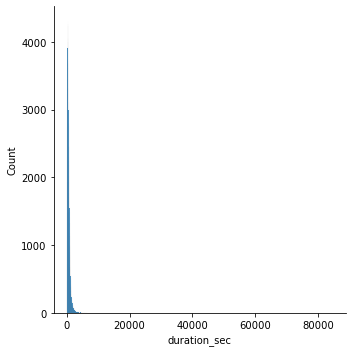

In [21]:
sb.displot(df_clean.duration_sec);

Let's make a new column for duration in minutes to view it more clearly.

In [22]:
df_clean['duration_mins'] = df_clean.duration_sec / 60

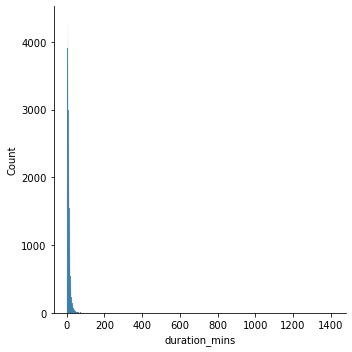

In [23]:
sb.displot(df_clean.duration_mins);

It seems that most of our data is approximately below the 60 mins duration.

In [24]:
df_clean.query('duration_mins > 60').duration_mins.count()

1386

In [25]:
df_clean = df_clean.query('duration_mins <= 60')

In [26]:
df_clean.duration_mins.describe()

count    173566.000000
mean         10.308359
std           7.396235
min           1.016667
25%           5.350000
50%           8.450000
75%          13.000000
max          59.933333
Name: duration_mins, dtype: float64

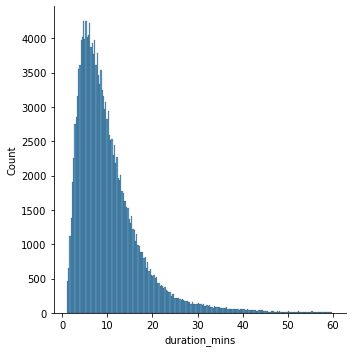

In [27]:
sb.displot(df_clean.duration_mins);

Since our distribuition is skewed to the right, we will adjust it by scaling it to log.

In [28]:
np.log10(df_clean.duration_mins.describe())

count    5.239465
mean     1.013190
std      0.869011
min      0.007179
25%      0.728354
50%      0.926857
75%      1.113943
max      1.777668
Name: duration_mins, dtype: float64

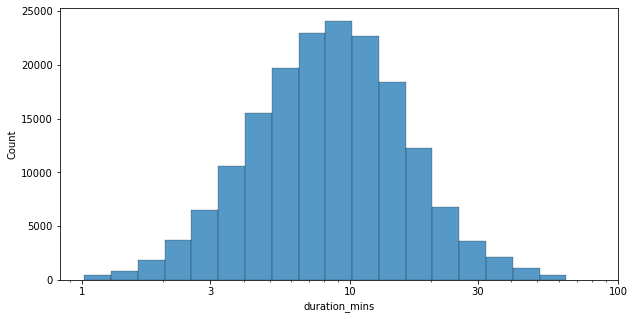

In [29]:
plt.figure(figsize=(10,5));
bins = 10 ** np.arange(np.log10(df_clean.duration_mins.min()), np.log10(df_clean.duration_mins.max())+0.1, 0.1)
ticks =  [1, 3, 10, 30, 100]
labels = ['{}'.format(x) for x in ticks]
sb.histplot(df_clean.duration_mins,bins = bins);
plt.xscale('log')
plt.xticks(ticks, labels);

Looking at this plot, we can determine that most bike users tend to take short trips that ranges from 4 to 16 minutes with an average of 10 minutes.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

<a id='start-end-station'></a>

## 3.2 Which start/end station had the most visits?

In [30]:
# A function for plotting the number of times users visit start/end station
def plot_station(df, station):
    plt.figure(figsize=(15,7));
    bins = np.arange(df[station].min()-1, df[station].max()+1, 1)
    ticks =  [x for x in range(df[station].min()-1, df[station].max()+1,10)]
    labels = ['{}'.format(x) for x in ticks]
    sb.histplot(df[station],bins = bins);
    plt.xticks(ticks, labels);

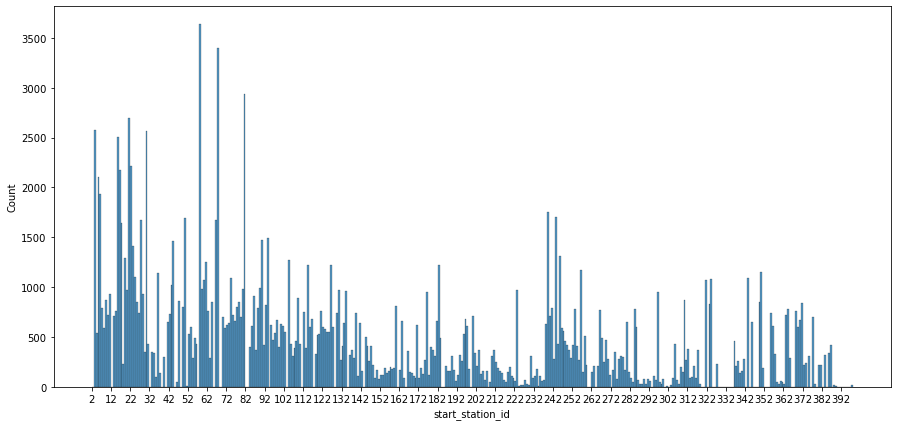

In [31]:
plot_station(df_clean, 'start_station_id')

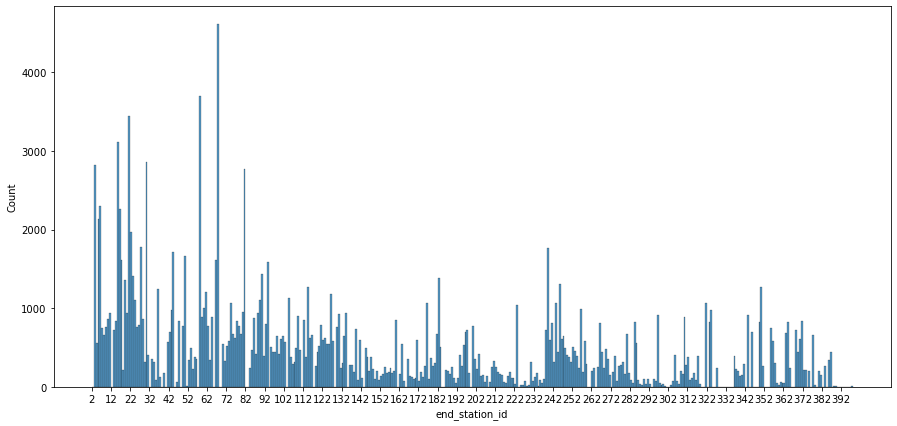

In [32]:
plot_station(df_clean,'end_station_id')

In [33]:
df_clean.start_station_id.value_counts()

58     3634
67     3401
81     2935
21     2696
3      2580
       ... 
301       8
51        7
224       4
300       3
344       2
Name: start_station_id, Length: 329, dtype: int64

In [34]:
df_clean.end_station_id.value_counts()

67     4610
58     3699
21     3440
15     3120
30     2864
       ... 
51        9
300       6
224       5
344       4
301       4
Name: end_station_id, Length: 329, dtype: int64

It seems that stations 58, and 67 are the most visited as either a start or an end station from bike users.

In [35]:
df.query('start_station_id == 58')['start_station_name'].iloc[0]

'Market St at 10th St'

In [36]:
df.query('start_station_id == 67')['start_station_name'].iloc[0]

'San Francisco Caltrain Station 2  (Townsend St at 4th St)'

<a id='service-time'></a>

## 3.3 At what time do people usually use the service? and when do they finish?

To get the time, let's first derive the hour from `start_time`, and `end_time`.

In [37]:
df_clean['start_hour'] = df_clean['start_time'].dt.hour
df_clean['end_hour'] = df_clean['end_time'].dt.hour

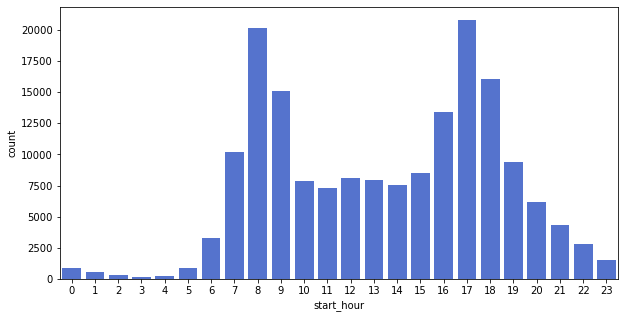

In [38]:
plt.figure(figsize=(10,5));
sb.countplot(data=df_clean,x='start_hour',color='royalblue');

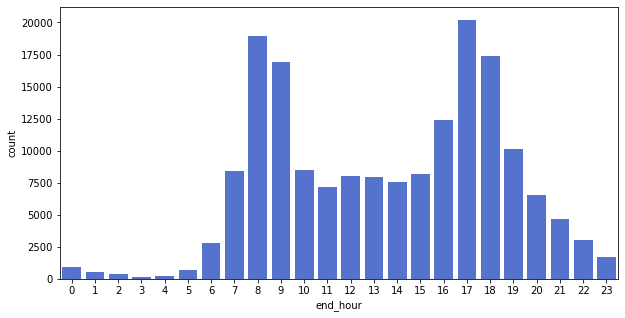

In [39]:
plt.figure(figsize=(10,5));
sb.countplot(data=df_clean,x='end_hour',color='royalblue');

The majority of users start to use the service from early morning at 6am with a peak hour at 8am. And for the afternoon, there is decent activity until we reach 5pm where there are more users using the services.
The peak hours for bike trips are 8AM and 5PM.

<a id='bi'></a>

## 4. Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

<a id='age-active'></a>

## 4.1 What age group is the most active for each gender?

In [40]:
def plot_description(title, x, y, size=15):
    plt.title(title,size=size);
    plt.xlabel(x,size=size);
    plt.ylabel(y,size=size);

In [41]:
df_clean.groupby('member_gender').member_gender.count() / df_clean.shape[0]

member_gender
Female    0.232874
Male      0.746540
Other     0.020586
Name: member_gender, dtype: float64

74% of users are males, and 26% are females. However, 2% of users specified their gender as *other*.

In [42]:
df_clean.member_age.describe()

count    173566.000000
mean         36.191034
std          10.113676
min          20.000000
25%          29.000000
50%          34.000000
75%          41.000000
max         121.000000
Name: member_age, dtype: float64

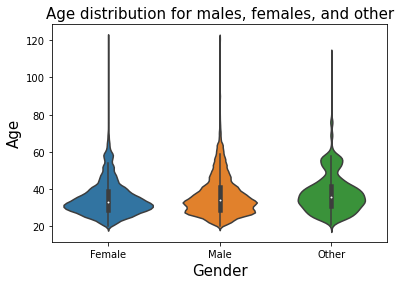

In [43]:
sb.violinplot(data=df_clean,x='member_gender',y='member_age');
plot_description('Age distribution for males, females, and other','Gender','Age')

The distribution of age for bike users in each gender. Let's try to normalize it by putting an age limit.

In [44]:
df_clean = df_clean.query('member_age <= 60')

In [45]:
df_clean.member_age.describe()

count    168639.000000
mean         35.298555
std           8.663622
min          20.000000
25%          29.000000
50%          34.000000
75%          40.000000
max          60.000000
Name: member_age, dtype: float64

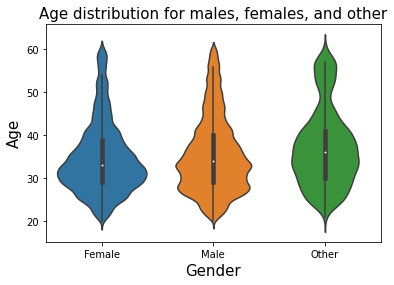

In [46]:
sb.violinplot(data=df_clean,x='member_gender',y='member_age');
plot_description('Age distribution for males, females, and other','Gender','Age')

This looks much better. Both genders, as well as other group, have smiliar distribution. We can say that the age group 25-42 are the most active. Late 20's and early 30's users are at the peak of activity compared to others.

<a id='ltsubxcus'></a>

## 4.2 Do users that have a subcription take longer trips than customers?

first, let's check numbers of each category:

In [47]:
df_clean.user_type.value_counts()

Subscriber    153068
Customer       15571
Name: user_type, dtype: int64

In [48]:
df_clean.user_type.value_counts() / df_clean.shape[0]

Subscriber    0.907667
Customer      0.092333
Name: user_type, dtype: float64

90.7% of users are subscribers, while customers amount to 9.3%.

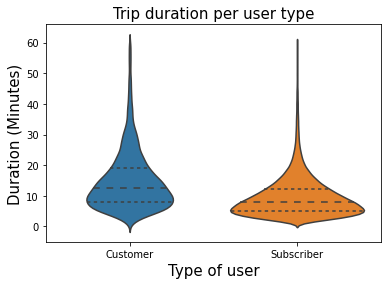

In [49]:
sb.violinplot(data=df_clean,x='user_type',y='duration_mins',inner='quartiles');
plot_description('Trip duration per user type','Type of user','Duration (Minutes)')

In [50]:
df_clean.groupby('user_type')['duration_mins'].describe()

,count,mean,std,min,25%,50%,75%,max
user_type,,,,,,,,
Customer,15571.0,14.978087,9.74191,1.033333,8.116667,12.550000,19.066667,59.916667
Subscriber,153068.0,9.792324,6.88776,1.016667,5.183333,8.116667,12.366667,59.933333


On average, Customers take 5 mintues longer trips than subsrcibers.

<a id='lubsubxcus'></a>

## 4.3 Do subsrcibers have their own lineup of bikes or do they use the same ones customers use?

In [51]:
df_clean.groupby(['bike_id','start_station_id','end_station_id']).bike_id.count()

bike_id  start_station_id  end_station_id
11       3                 54                1
         15                93                1
         17                90                1
         19                112               1
         22                86                1
                                            ..
6644     381               100               1
6645     238               241               1
         241               385               1
         245               256               1
         256               243               1
Name: bike_id, Length: 164787, dtype: int64

First, let's check the number of bikes that we have:

In [52]:
df_clean.bike_id.value_counts().count()

4601

We have 4601 bikes. And now we'll check for each bike if they have been used by which user type:

In [53]:
temp = df_clean.groupby(['bike_id','user_type']).size()
temp

bike_id  user_type 
11       Customer       6
         Subscriber    26
12       Customer       1
         Subscriber    21
13       Customer       1
                       ..
6638     Subscriber    99
6644     Customer       9
         Subscriber    69
6645     Customer       0
         Subscriber     4
Length: 9202, dtype: int64

In [54]:
temp = temp.reset_index(name='count')

In [55]:
temp

,bike_id,user_type,count
0,11,Customer,6
1,11,Subscriber,26
2,12,Customer,1
3,12,Subscriber,21
4,13,Customer,1
...,...,...,...
9197,6638,Subscriber,99
9198,6644,Customer,9
9199,6644,Subscriber,69
9200,6645,Customer,0


In [56]:
ctmr = temp.query('user_type == "Customer" and count == 0').bike_id.values

In [57]:
sub = temp.query('user_type == "Subscriber" and count == 0').bike_id.values

In [58]:
subxctmr = [s for s in sub if s in ctmr]

In [59]:
subxctmr

[]

All bikes have been used, no bike left unused.

It seems that it is not the case in which a bike is reserved for a subscriber. However there are cases in which no customers have ridden bikes that subscribers rode, and vice versa.

<a id='multi'></a>

## 5. Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

<a id='tripcount'></a>

## 5.1 How many trips did the bikes take from the same start station to the same end station?

In [60]:
df_trips = df_clean.groupby(['bike_id','start_station_id','end_station_id']).bike_id.count()

df_trips = df_trips.reset_index(name='trips')

df_trips

,bike_id,start_station_id,end_station_id,trips
0,11,3,54,1
1,11,15,93,1
2,11,17,90,1
3,11,19,112,1
4,11,22,86,1
...,...,...,...,...
164782,6644,381,100,1
164783,6645,238,241,1
164784,6645,241,385,1
164785,6645,245,256,1


In [61]:
df_trips.trips.value_counts()

1    161356
2      3117
3       243
4        50
5        11
6         5
7         5
Name: trips, dtype: int64

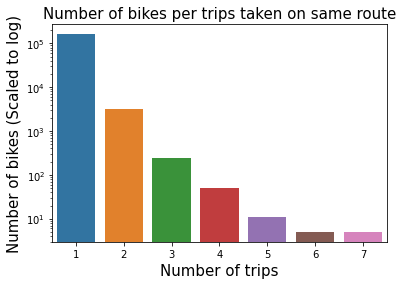

In [62]:
sb.countplot(data=df_trips, x='trips')
plot_description('Number of bikes per trips taken on same route','Number of trips','Number of bikes (Scaled to log)')
plt.yscale('log');

It looks like there have been occasions of bikes to take the same route of trip more than once, even up to 7 times.

<a id='peaktrip'></a>

## 5.2 What is the peak trip duration and age for bikers on each day of the week?

Let's derive days of the week `start_time`:

In [63]:
df_clean['start_day'] = df_clean['start_time'].dt.strftime('%A')

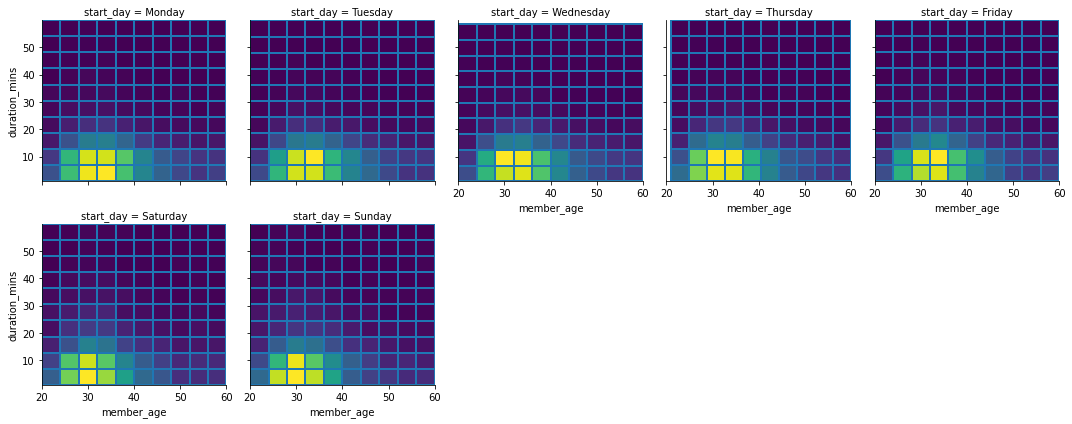

In [64]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

g = sb.FacetGrid(data = df_clean, col = 'start_day', col_wrap = 5, col_order=days, height = 3);
g.map(plt.hist2d, 'member_age', 'duration_mins');

On weekdays, users in their mid 30's tend use the bikes the most with an average duration of 7.5 minutes. However, during the weekends, users in their early 30's are more noticable in using the bikes to take a trip that lasts less than 7.5 minutes on average. 

In [65]:
df_clean.to_csv('df_master.csv', index=False)